## In Class: 2019/01/14
## Projective transforms

Your task for the day is to write a program that simulates taking a digital photograph.  Imagine that we have a camera positioned at the origin, with a focal length of 1000 pixels and a sensor size of 2000 x 1000 pixels.  Coordinates.txt contains $p$ (point coordinates) and $I$ (intensity values) of a simulated landscape.  Use a projective transform to simulate a digital image of the landscape.  (Don't forget to crop your image to the sensor size). 

Some relevant equations:

3D world coordinates to generalized camera coordinates:
$$x = p_0/p_2$$
$$y = p_1/p_2$$

generalized camera coordinates to pixel values:
$$ u = f x + c_x $$
$$ v = f y + c_y, $$
where $u$ and $v$ are the pixel locations, $f$ is the focal length, and $c_x$ and $c_y$ are the pixel coordinates of the image center.  

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

In [2]:
sensor_size = (2000, 1000)
f = 1000

In [3]:
# p: (x,y,z) coord arrays, I: intensity
*p, I = np.loadtxt("./coordinates.txt", unpack=True)

<IPython.core.display.Javascript object>


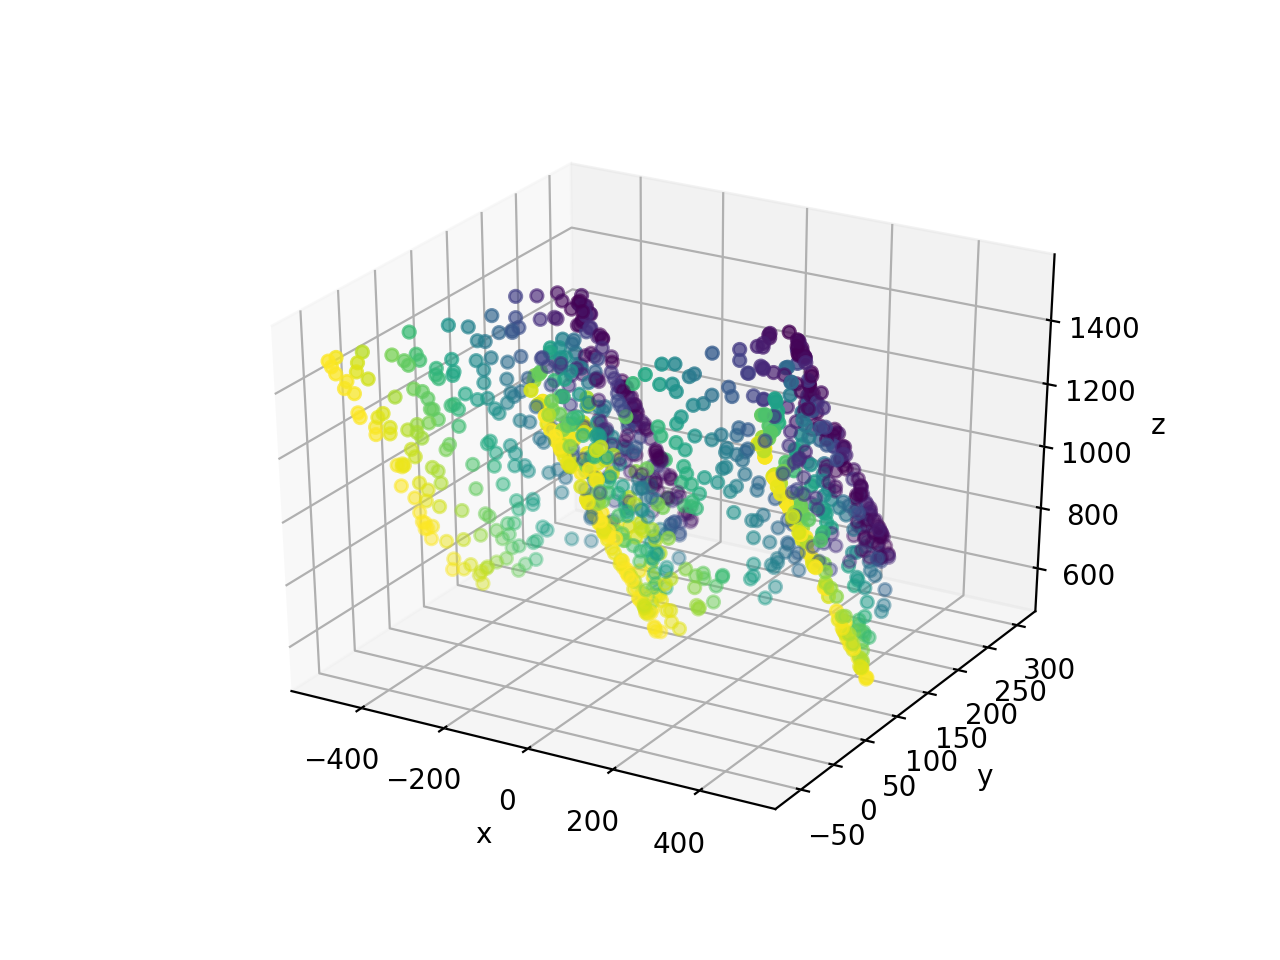

Text(0.5, 0, 'z')

In [4]:
# Visualize 3D scene

# calculate intensity colormap
norm = Normalize(I.min(), I.max())
icm = plt.get_cmap("viridis")
icolors = icm(norm(I))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(p[0], p[1], p[2], c=icolors)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [5]:
# Generalized
x = p[0] / p[2]
y = p[1] / p[2]
# Sensor pixel coords
u = (x * f) + (sensor_size[0] / 2)
v = (y * f) + (sensor_size[1] / 2)
# Separate into discrete pixels by rounding
# to nearest int
u = np.around(u).astype(int)
v = np.around(v).astype(int)

In [6]:
# Set a background value so low intensity will show up
span = I.max() - I.min()
background = I.min() - (0.5 * span)

img = np.zeros(sensor_size) + background
for i, inten in enumerate(I):
    ui = u[i]
    vi = v[i]
    if ui < sensor_size[0] and vi < sensor_size[1]:
        img[ui, vi] = inten
    # else: pixels were outside of sensor bounds

<IPython.core.display.Javascript object>


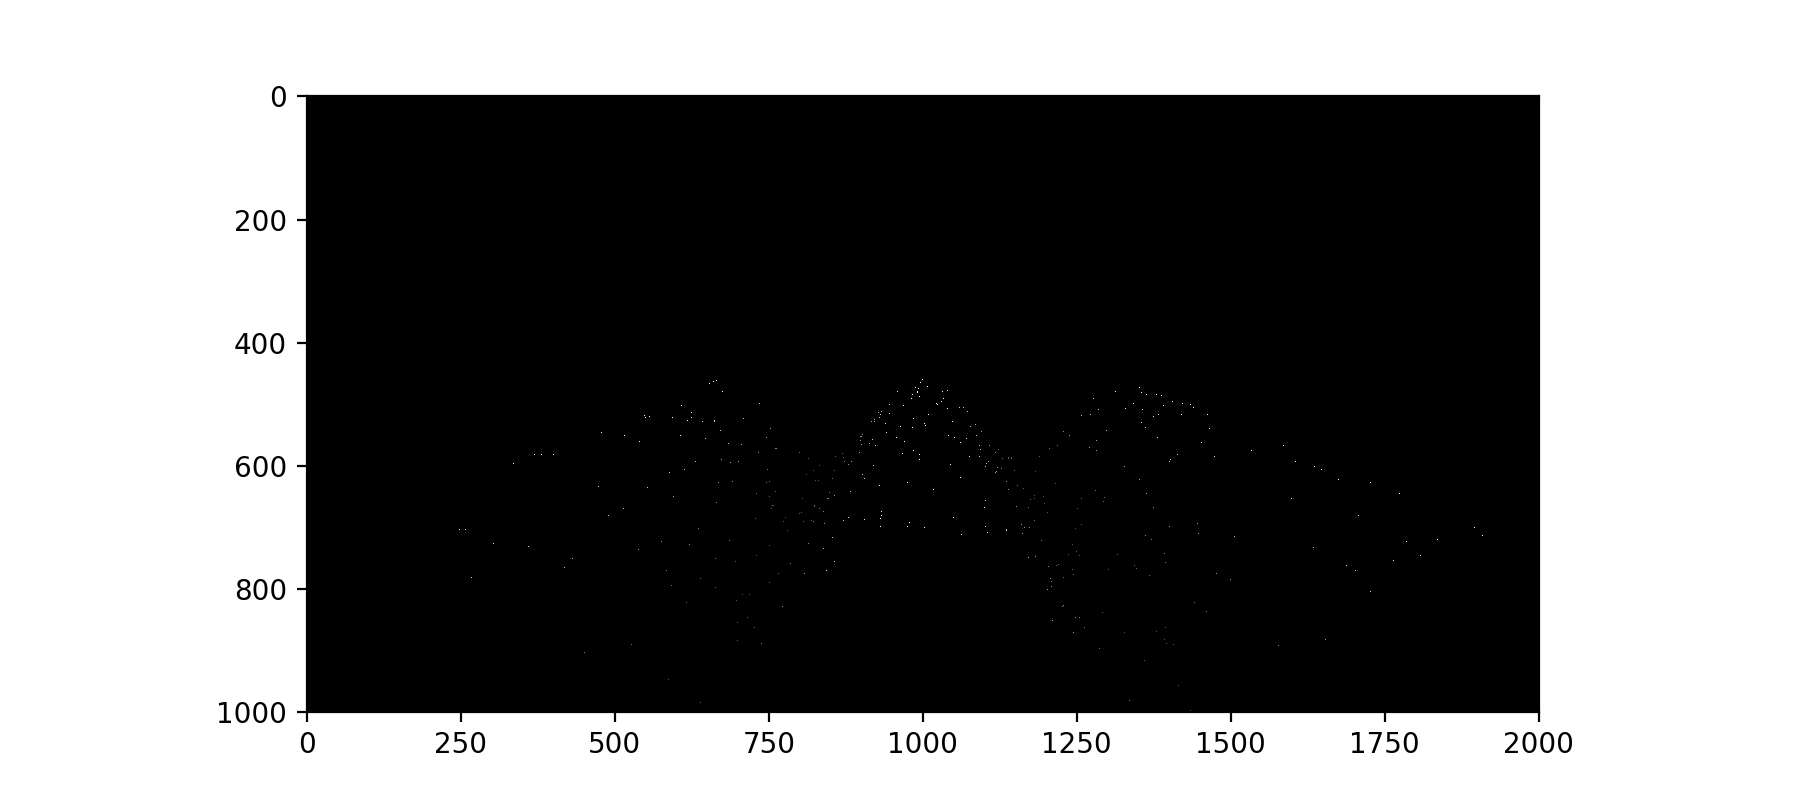

In [7]:
plt.figure(figsize=(9, 4))
plt.imshow(img.T, cmap=plt.get_cmap("gray"))

<IPython.core.display.Javascript object>


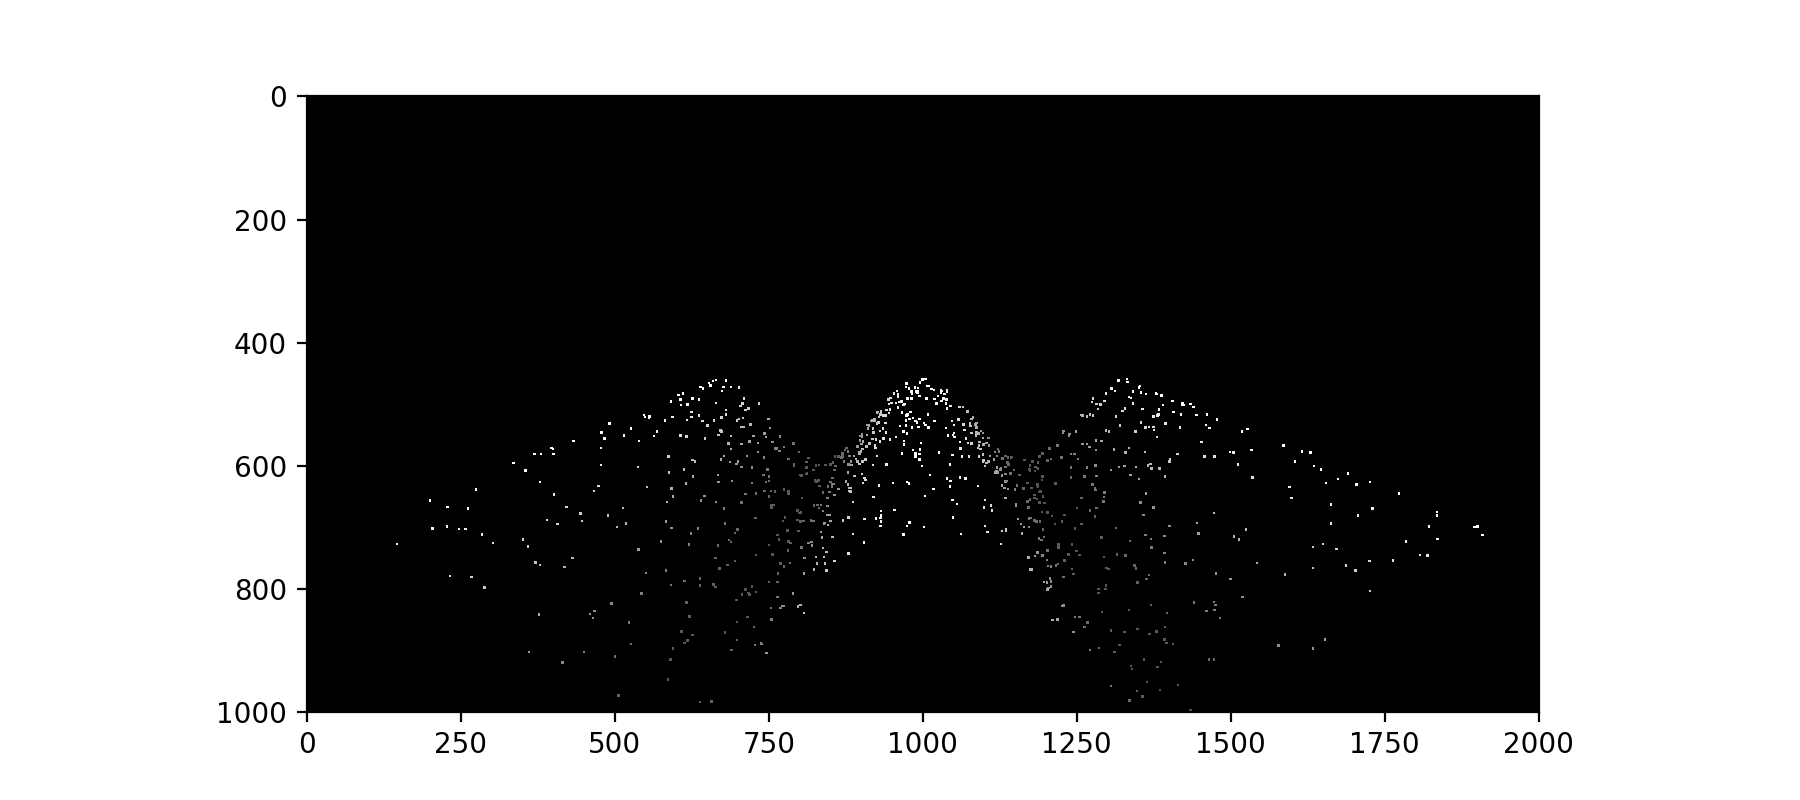

In [10]:
# Make light hit more pixels
r = 2
img2 = np.zeros(sensor_size) + background
for i, inten in enumerate(I):
    ui = u[i]
    vi = v[i]
    if ui < sensor_size[0] and vi < sensor_size[1]:
        img2[ui-r:ui+r, vi-r:vi+r] = inten

plt.figure(figsize=(9, 4))
plt.imshow(img2.T, cmap=plt.get_cmap("gray"))